# Technical Terms
## sources
* Paper: Random Projection Forests (Jovo's lab)
    * link: https://arxiv.org/pdf/1506.03410.pdf
* Lecture: intro to ML, EN.601.475	(Raman Arora)
    * link: https://spiralscience.slack.com/files/U1VV9N1DH/FM1G46A74/cs475sp19-lectures.zip (slack team-forbidden-forest group)
* Paper: Sparse Projection Oblique Randomer Forests (Jovo's Lab)
    * link: https://spiralscience.slack.com/files/U703FP137/FN20JCLSH/sporf.pdf (slack SDD group)
    * link: 

#### Classification <br>
$(X,Y) \sim f_{X,Y}$ $X \in \mathcal{X}= \mathbb{R}^P$ is real data vector. <br> $Y \in \mathcal{Y}=\{c_1,...,c_K \}$ represents catagories. <br> $\hat{Y}$ is the $Y$'s prediction from our algorithm.<br> Given traning data set $D_n=\{X_i,Y_i\}\in \mathcal{D_n}$, our goal is to learn classifier algorithm $h(\dot|D_n): \mathbb{R}^p \rightarrow \mathcal{y}$ and minimize the loss $h^*(X)= \text{argmax}_k P_{Y|X}(Y=k|X) $ or $\mathcal{L}=\mathbf{E}_{X,Y}[(Y \neq h(X|D_n) \text{ or } \hat{Y})^2]$

#### Regression <br>
$Y \in \mathcal{Y}= \mathbb{R}$ and the algorithm minimize the mean-squared generalization error $\mathcal{L}=\mathbb{E}_{X,Y}[(Y-h(X|D_n) \text{ or } \hat{Y})^2]$

#### Decision tree <br>

Decision tree in summary
* important advantages:
    * interpretable
    * can deal with multi-class and nonlinear
* important limitations:
    * limit to axis-aliged splits
    * high variance despite regularization

Cover both __classification__ and __regression__. Figure below (from EN.601.475 lecture 9) shows the binary decision tree. Decision Tree algorithms are called Classification and Regression Tree (CART). Decision Tree have two goals:

* To calculate the __prob__ that a given data belong to each class
    
* To __classify__ the data by assigning it to the most likely class
    
Model coressponding to a tree with $M$ leaves; leaf $m$ has $X$ in $R_m$ and  $\hat{y}=f(X)=\sum^{M}_{m=1}f_m [X\in R_m ]$. <br> 

* For the regression tree, We minimize the loss (mean square) $\text{min} \frac{1}{N}\sum^N_{i=1}(f(x_i)-y_i)^2 \rightarrow f_m=\frac{1}{|\mathcal{I}_m|}\sum_{i\in \mathcal{I}_m}y_i$ <br>where $\mathcal{I}_m=\{i;x_i\in R_m \}$ is the set of index that $X$ in region $R_m$.

* For the classification tree, we minimize loss from $\text{argmin}_{\hat{y}_m}\sum_{i\in \mathcal{I}_m}[[y_i\neq \hat{y}_m]]$. We set value $=1$ when $y_i\neq \hat{y}_m$ and $0$ otherwise.

Important notation are:<br>
$N_m= |\mathcal{I}_m|=|{i : X_i\in R_m}|$ the size of a leaf,<br>
$f_m= \frac{1}{N_m}\sum_{i\in \mathcal{I}_m}y_i$ the value in the leaf,<br>
$Q_m(T)= \frac{1}{N_m}\sum_{i\in\mathcal{I}_m}(y_i-f_m)^2$ the leaf error,<br>
$C_{\lambda}(T)=\sum^{|T|}_{m=1} N_m Q_m (T) + \lambda|T|$ 
Cost-complexity criterion of tree $T\subset T_0$. <br>
$T$ is obtained from $T_0$ collapsing some internal nodes and mearging leaves.   

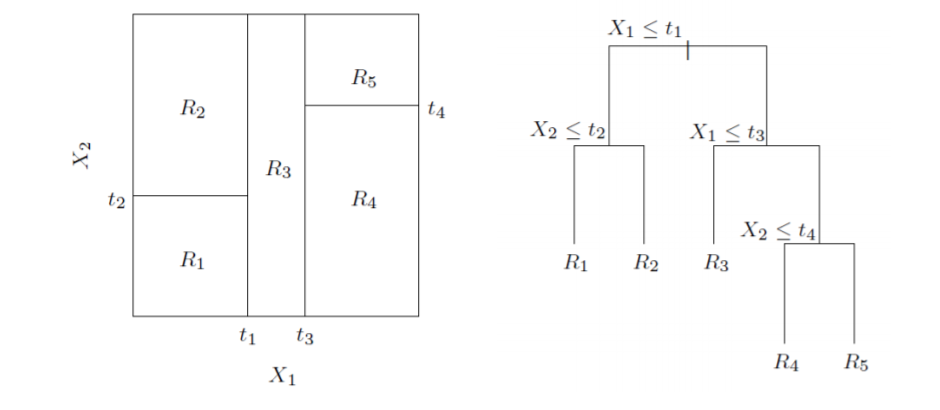

In [16]:
from IPython.display import Image
Image(filename='DT_fig1.png',width=500)  # Convertion from 2D data to decision tree

#### Random Forests (RF) <br>

in summary
* have $N$ data point $D_n={X_i,Y_i}^n_1\in \mathcal{D}_n$, each with $d$ features (i.e. shape, size, cost,...)
* build $T$ tree independently
* Each tree has their own classification. Sampling $N$ point with replacement $N'<<N$ and look at a random subset of $m<d$ features
* __B.C.__: when (i) max tree depth is reached (ii) minimum # of data in a leaf is reached
* Make a prediction tree: average (regression), or vote (classification, but how? $\rightarrow$ see to bottom of the topic


RF = large set $T$ of decorrelated decision trees. <br>
A common measure of information gain in decision tree is the decrease in Gini impurity for a set of observation $S$, $I(S)=\sum^K_{k=1}f_k(1-f_k),$ where $f_k=\frac{1}{|\mathcal{S}|\mathbb{I}[y_i=k]}$ 

The paper followed Breiman's recommendation of the decrease in objective as the spitting criteria, $I(\mathcal{S}=\sum_{y\in S}(y-\bar{y})^2$, where $\bar{y}=\frac{1}{|S|}\sum_{y\in S}y$, the average value of $y\in \mathcal{S}$

Set $\theta(j,\tau),$ where $j$ is a dimension index and $\tau$ is a splitting treashold. 

$$S^L(\theta)= \{i,x_i^{(j)}\leq \tau,\forall i \in \mathcal{S}\}$$ 
$$S^R(\theta)= \{i,x_i^{(j)}> \tau,\forall i \in \mathcal{S}\}$$ 
$$\theta^* = \underset{\theta}{\text{argmax}} |S|I(S) - |S^L(\theta)|I(S^L(\theta)) - |S^R(\theta)|I(S^R(\theta))$$

__Prediction Process__: 
From the optimization above, we search for the best splitting treshold $\tau^*$. Each tree has its own local prediction of the data $x$. Data $x$ moves down the tree (via splitting treshold) until the terminal node is reached. $\hat{y}^{(t)}$ is the prediction from $t^{th}$ tree
* plurality vote (regression) of the $\hat{y}$ is from
    * __classification__: $\hat{y}= \underset{c_k\in\mathcal{Y}}{\text{argmax}}{\sum}^T_{t=1} \mathbb{T}[\hat{y}^{(t)}=c_k]$
    * __cregression__: $\hat{y}= \frac{1}{|T|}{\sum}^T_{t=1}\hat{y}^{(t)}$
    
#### SPORF (Spares PRojection Oblique Randomer Forest)

__drawback of the previous methods__: RF uses only one feature for each splitting node. SPORF 

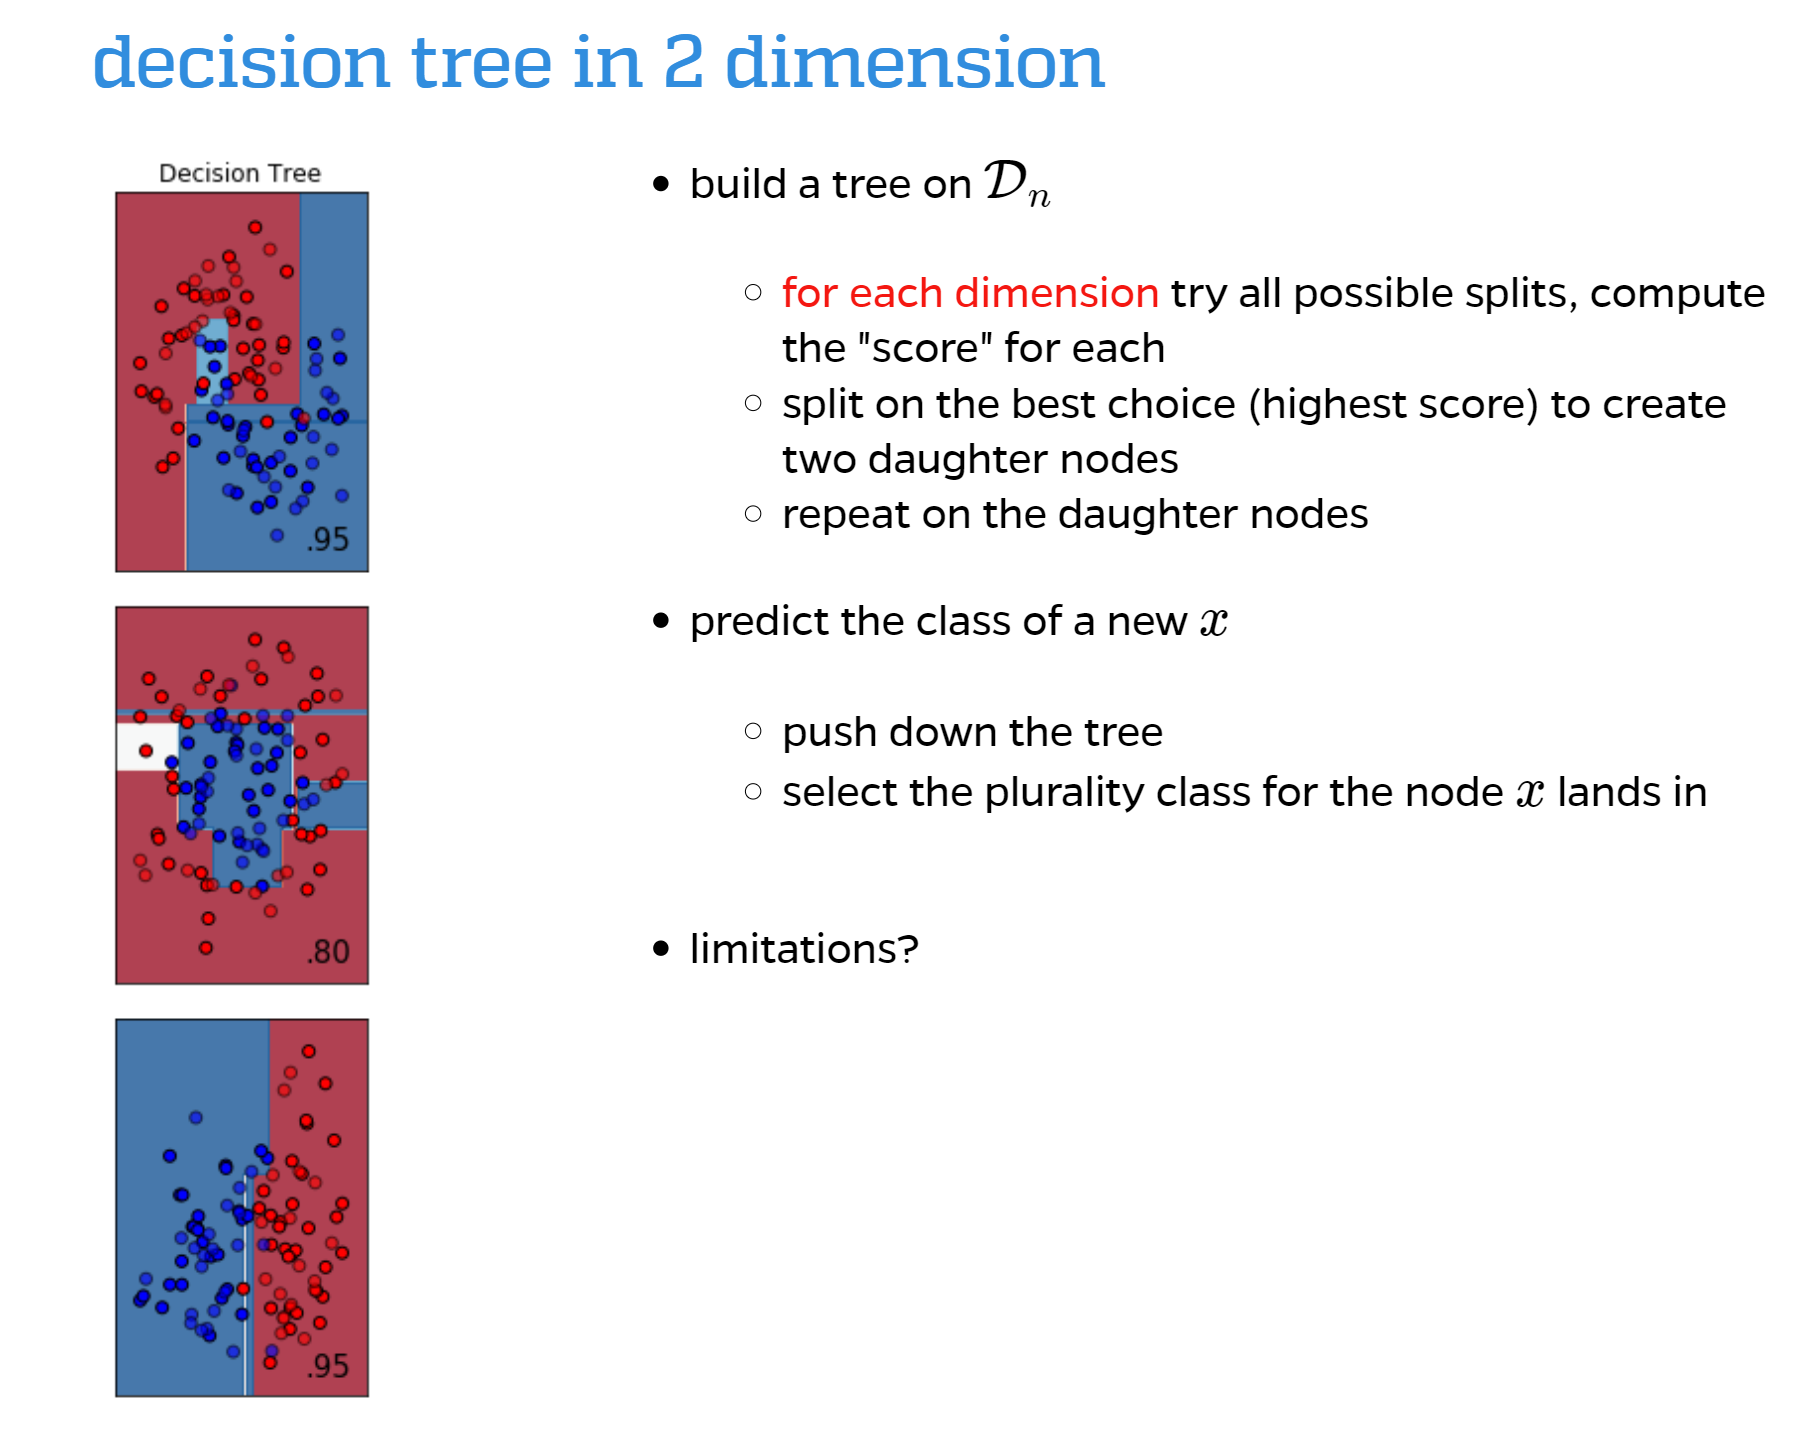

In [13]:
Image(filename='DT_fig2.png',width=500) # 2D in decision tree [Jovo's presentation]


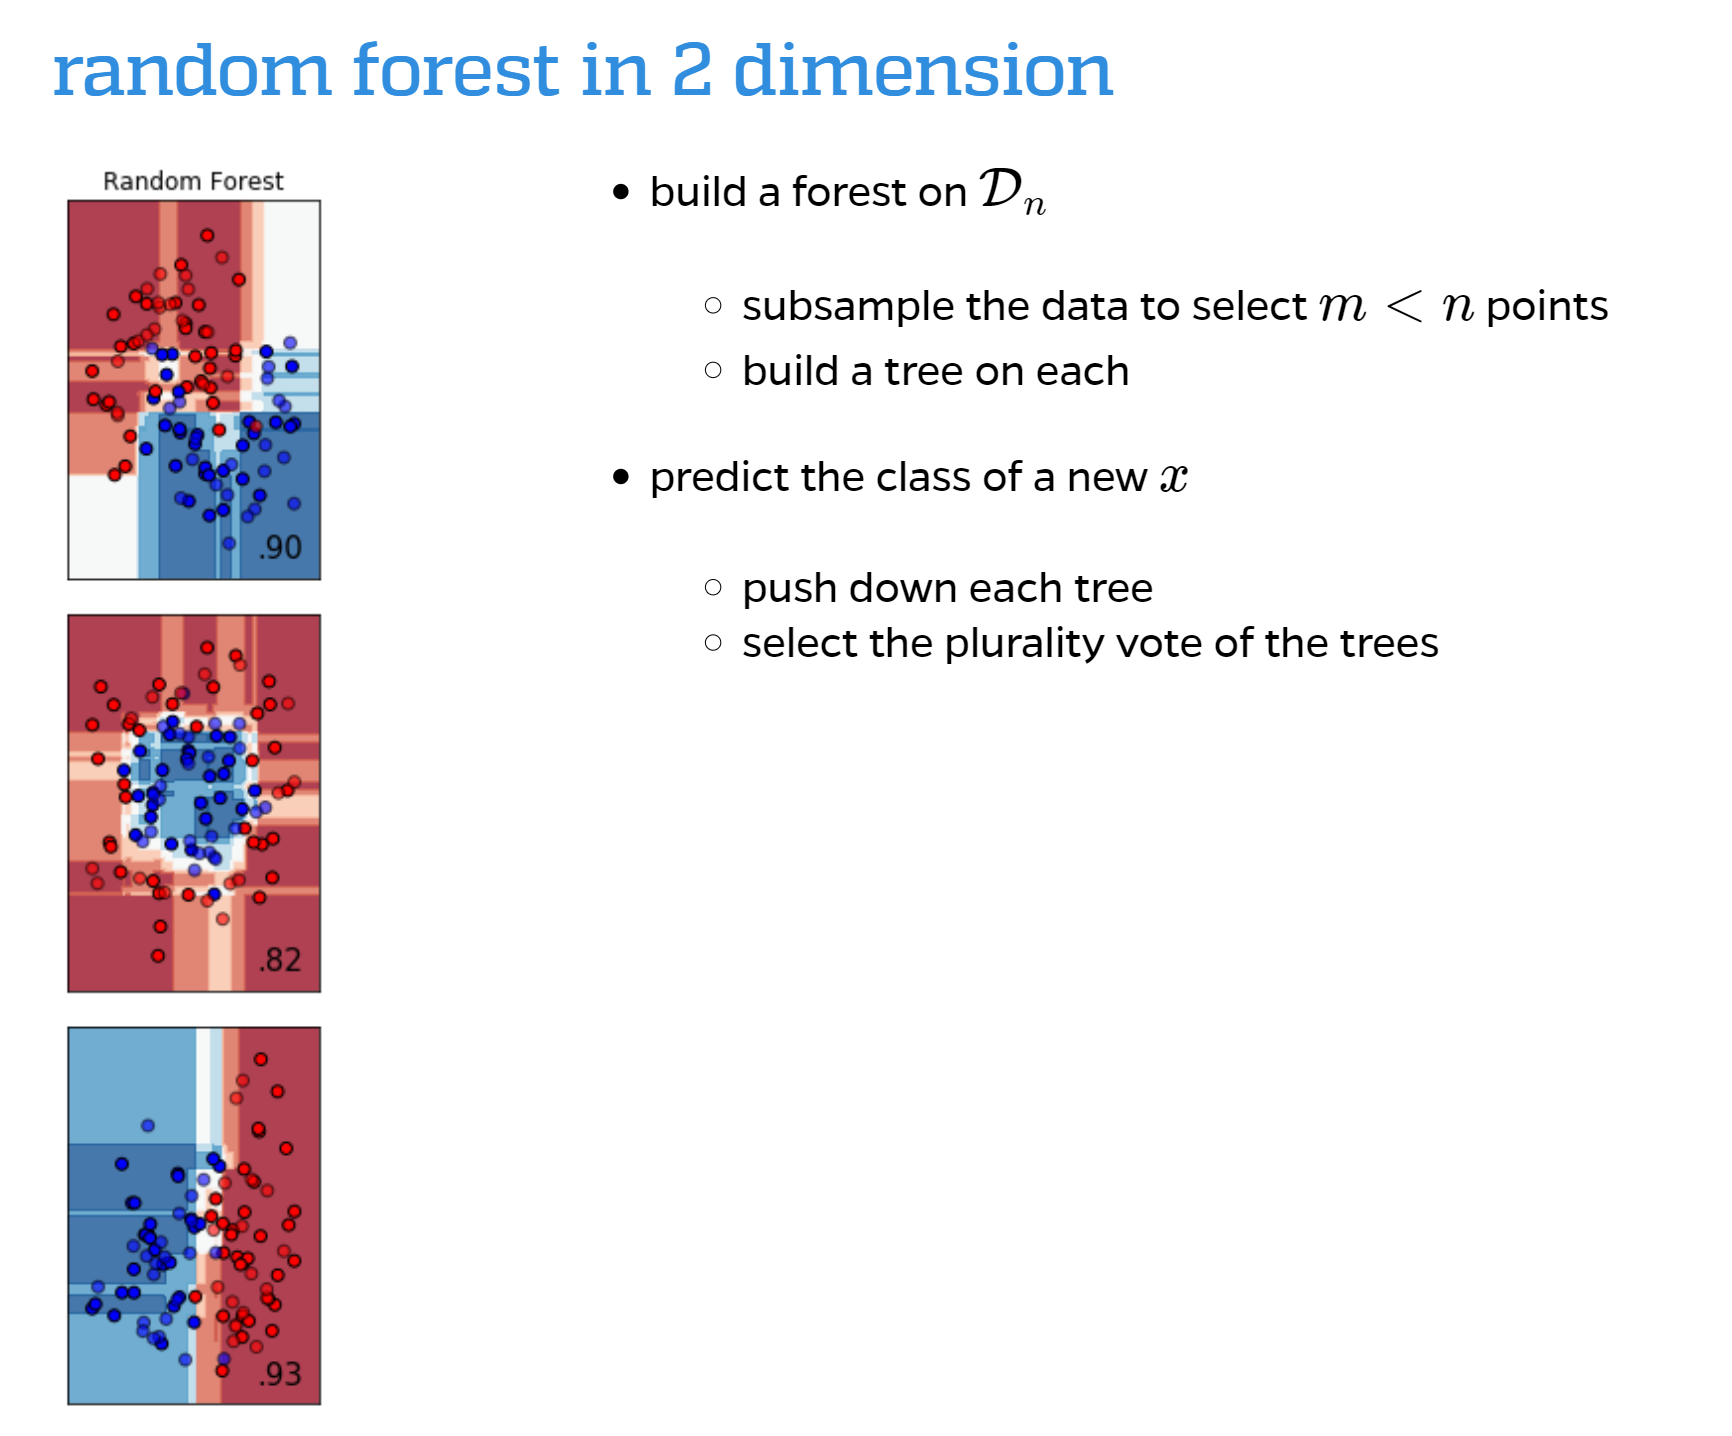

In [14]:
Image(filename='RF_fig1.png',width=500) # 2D in RF [Jovo's presentation]


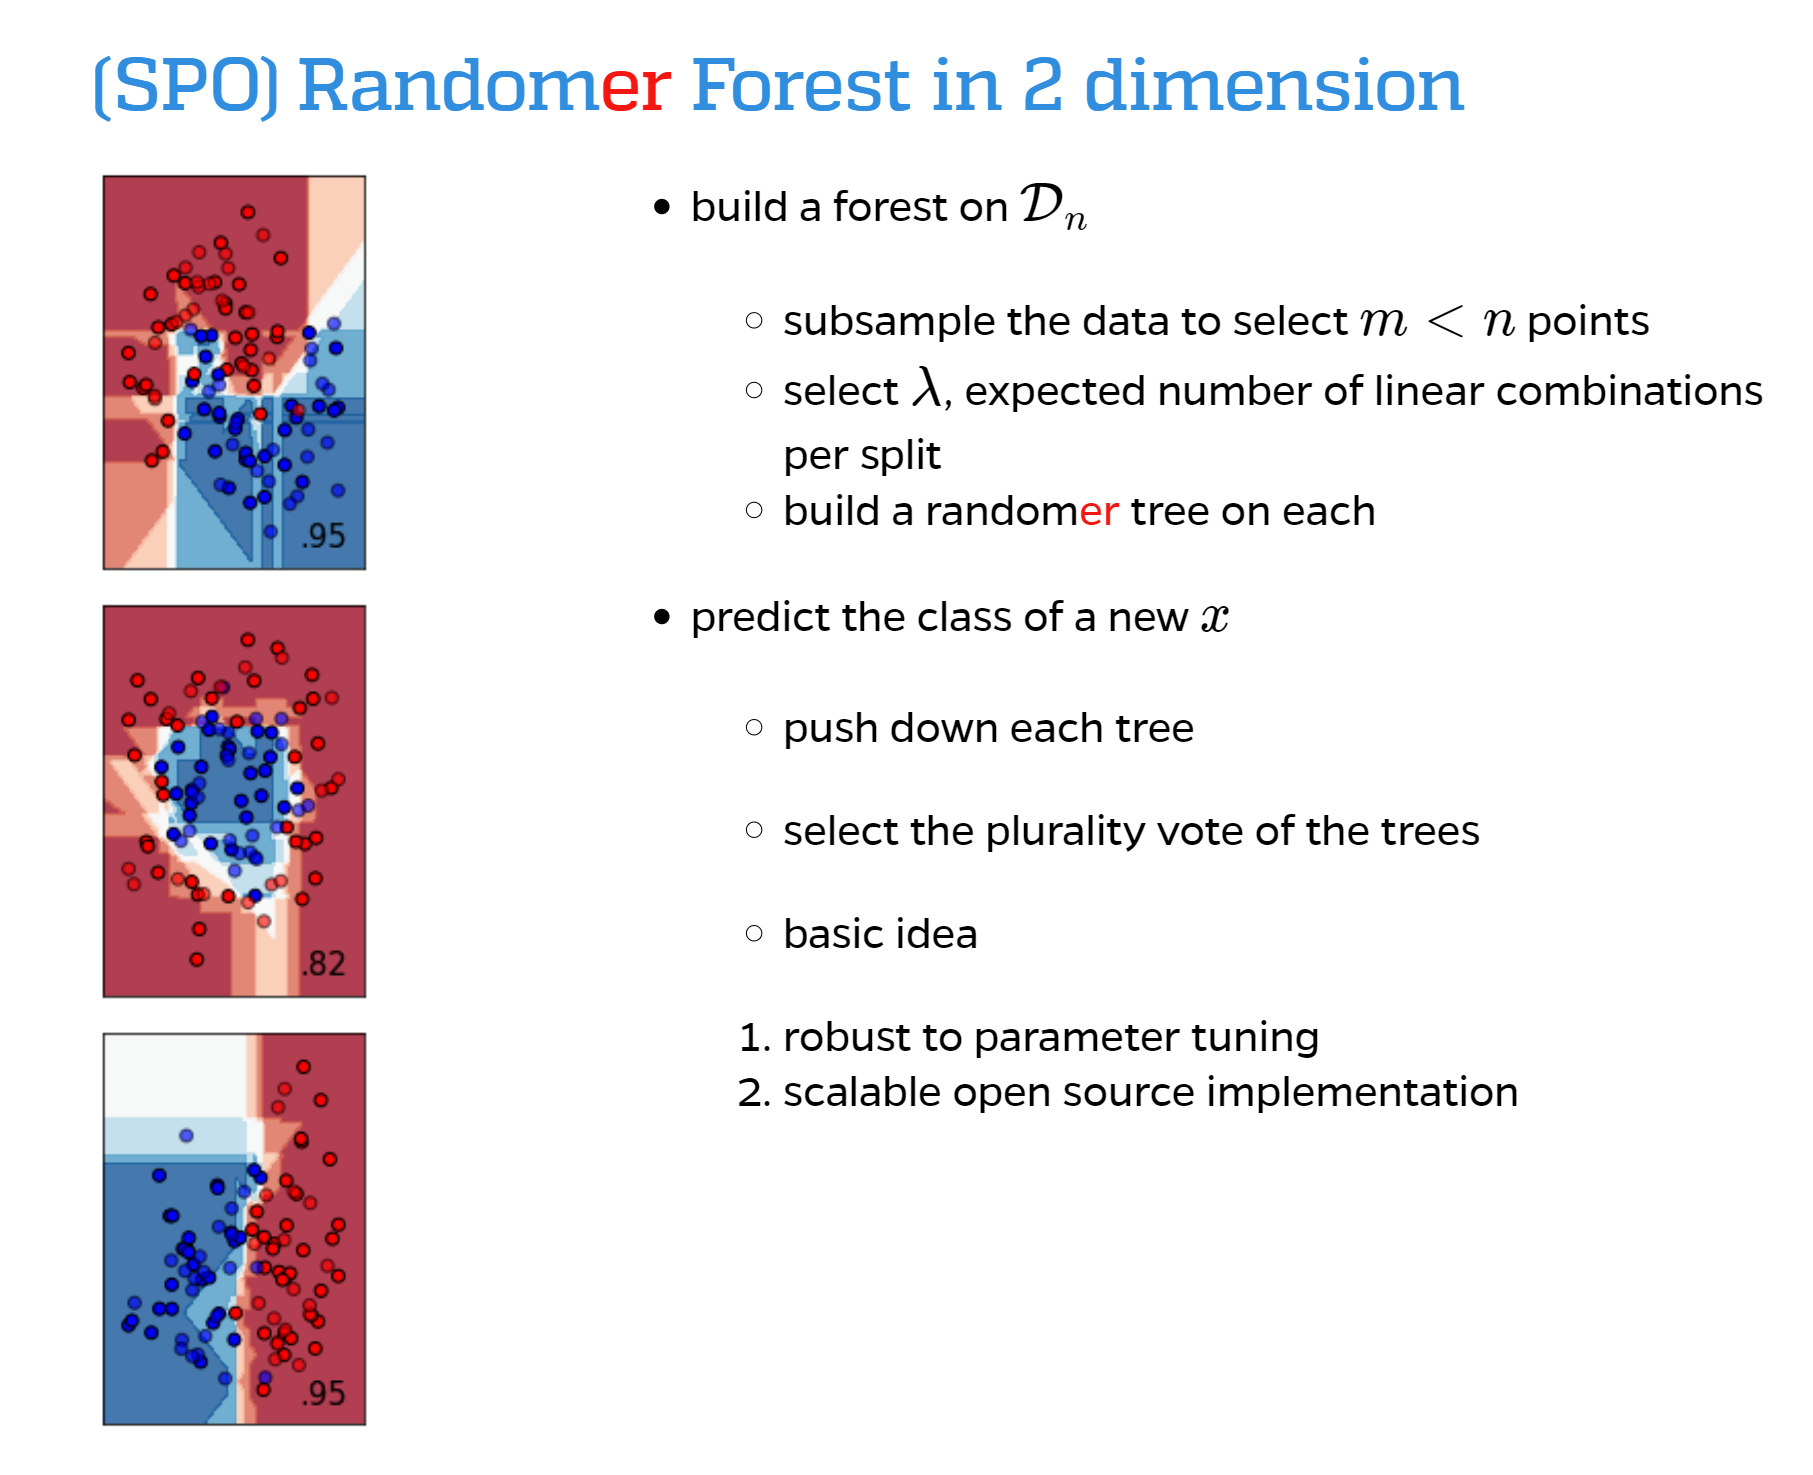

In [15]:

Image(filename='SPORF_fig1.png',width=500) # sample of 2D data in SPORF [Jovo's presentation]